## **Exploratory Data Analysis on Facebook**
![Analyze the Facebook data](http://www.startupover.com/en/wp-content/uploads/2013/11/112.jpg)

**Developed By - Sumit Rathi**


#### Exploration ideas:

1. Date of birth (age) analysis 
2. Friend count analysis
3. Tenure analysis 
4. Like analysis



### Upload and understand facebook dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# Upload facebook dataset
facebook_data = pd.read_table('D://PythonLearn/pseudo_facebook.tsv')

In [4]:
# Print details of each column of dataset
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [4]:
# Print descriptive statistics of dataset
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


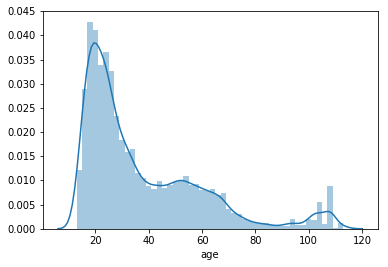

In [39]:
sns.distplot(facebook_data['age'])
plt.show()

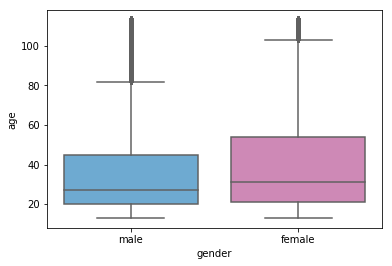

In [34]:
pkmn_type_colors = ['#5DADE2',  # NA
                    '#DA7DBA',  # WE
                   ]

palette=pkmn_type_colors
sns.boxplot('gender', 'age', data=facebook_data, palette=pkmn_type_colors )
plt.show()

### **Data Cleaning**

Performing following activities on data

1. Filled missing values in gender (175 places around .17%) by mode of gender
2. Filled missing value in tenure (2 places around .002%) by mean of tenure
3. Removed outliers on the basis of age (there are few users more than 100 years which seems invalid)
4. Removed the users whose tenure is more than 30 days and they have no friends and even not doing any activities
5. Removed outliers on the basis of friends (After analysis of dataset found only 5% of users having more than 500 friends)

In [21]:
# Calculate the number of users who are having age 100+
count100plus = facebook_data.age[facebook_data.age>100].count()
print('No of users who have age 100+ are '+ str(count100plus) + ' which is ' + str(count100plus/facebook_data.age.count()*100)+'% of total population')

No of users who have age 100+ are 3687 which is 3.7241295718311562% of total population


In [26]:
# Calculate number of users genderwise
facebook_data.groupby('gender')['gender'].count()

gender
female    40254
male      58574
Name: gender, dtype: int64

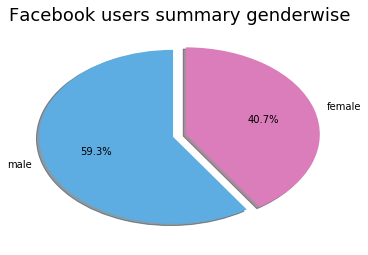

In [27]:
# Vizualize the number of facebook users genderwise
labels = ['male', 'female']
sizes = facebook_data.gender.value_counts()
colors = ['#5DADE2', '#DA7DBA']
explode = (0.05, 0.05)

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Facebook users summary genderwise', fontsize=18)
plt.show()

This graph shows that 59.3% of facebook users are male and 40.7% are female so male users are more on facebook than female

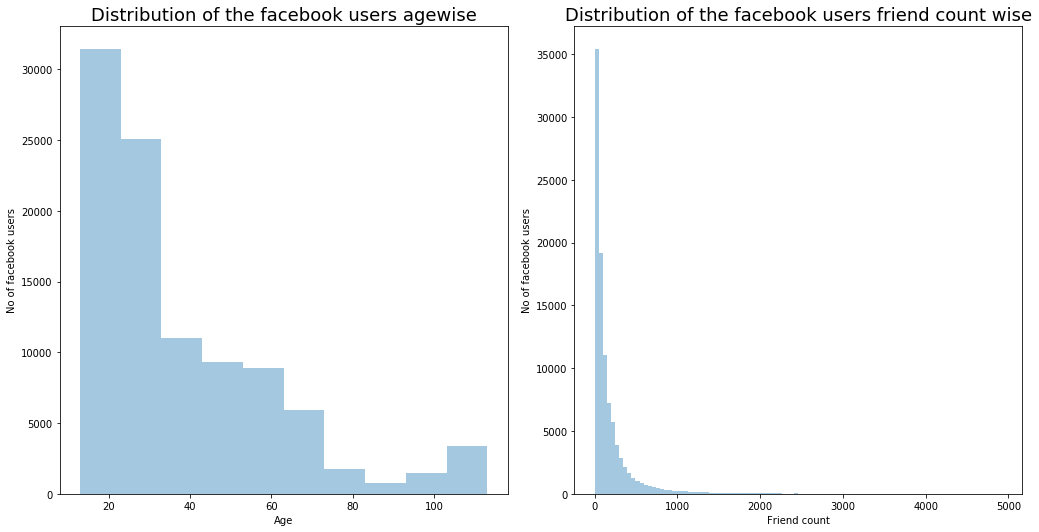

In [6]:
# Draw distribution plot to vizualize the data skewness on the basis of age and friend count

#fig = plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
sns.distplot(facebook_data['age'], bins=10, kde=False)
plt.xlabel('Age')
plt.ylabel('No of facebook users')
plt.title('Distribution of the facebook users agewise', fontsize=18)

plt.subplot(1,2,2)
sns.distplot(facebook_data['friend_count'], bins=100, kde=False)
plt.xlabel('Friend count')
plt.ylabel('No of facebook users')
plt.title('Distribution of the facebook users friend count wise', fontsize=18)

plt.tight_layout()
plt.show()

This shows that age and friend count column are positive skewed and friend count is highly skewed

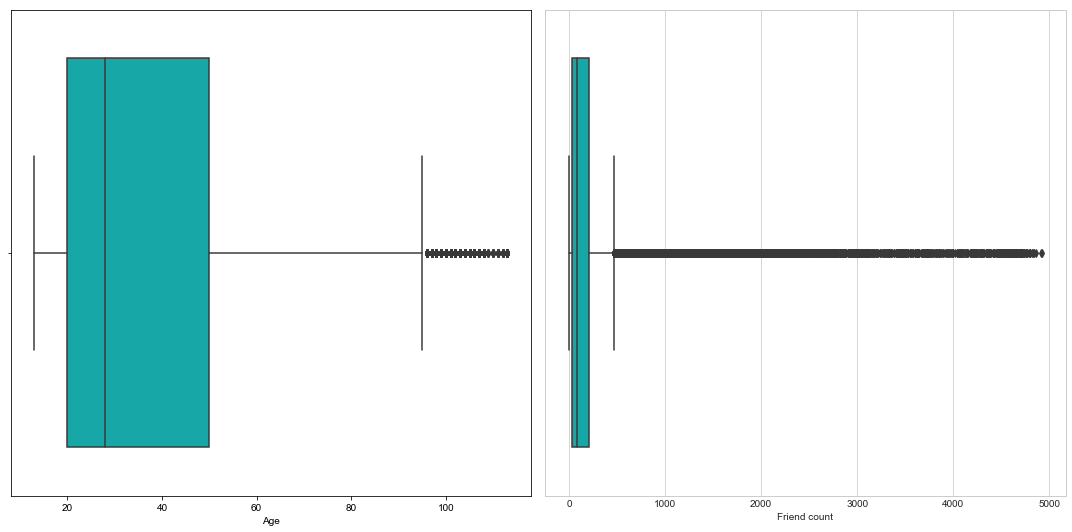

In [7]:
# Draw a boxplot to visualize outliers in respect of age and friends count

fig = plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
sns.set_style("whitegrid")
sns.boxplot(x='age', data=facebook_data, color='c')
plt.xlabel('Age')

plt.subplot(1,2,2)
sns.set_style("whitegrid")
sns.boxplot(x='friend_count', data=facebook_data, color='c')
plt.xlabel('Friend count')

plt.tight_layout()
plt.show()

Box plot shows the outliers in respect of age and friend count

In [8]:
# Gender is missing in 175 places of dataset that is .17% and these missing gender are replaced by mode of gender

facebook_data['gender'].fillna(facebook_data['gender'].mode()[0],inplace=True)

In [9]:
# Tenure is missing in only 2 places of dataset, i.e .002% and these missing tenure are replaced by mean of tenure

facebook_data['tenure'].fillna(facebook_data['tenure'].mean(),inplace=True)

In [10]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)

In [11]:
# Generic function to find outliers from any column

def detect_outliers(col, length):
  Q1 = np.percentile(facebook_data[col],25)
  Q3 = np.percentile(facebook_data[col],75)
  IQR = Q3 - Q1
  
  # outlier step
  outlier_step = length * IQR
  
  # Determine a list of indices of outliers for feature col
  outlier_list_col = facebook_data[(facebook_data[col] < Q1 - outlier_step) | (facebook_data[col] > Q3 + outlier_step )].index
  
  return outlier_list_col

In [12]:
# Get the outliers in the age and remove records from dataset

outliers_to_drop = detect_outliers('age', 1.5)
facebook_data_remout_age = facebook_data.drop(facebook_data.index[outliers_to_drop])
facebook_data = facebook_data_remout_age

In [13]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)

In [14]:
# Remove the records where the friend_count is 0 and the tenure is more than 30 days. These users will be treated not active user.

facebook_data_rem_friend_count_0 = facebook_data.drop(facebook_data.index[(facebook_data['friend_count'] == 0) & (facebook_data['tenure'] > 30)])
facebook_data = facebook_data_rem_friend_count_0

In [15]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)


In [16]:
# Get the outliers in friend count and remove records from dataset

outliers_to_drop = detect_outliers('friend_count', 2.5)
facebook_data_remout_friend_count = facebook_data.drop(facebook_data.index[outliers_to_drop])
facebook_data = facebook_data_remout_friend_count

In [17]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)

In [18]:
# Converting categorical to numerical

default_dummies = pd.get_dummies(facebook_data.gender, prefix='gender')
default_dummies.drop(default_dummies.columns[0], axis=1, inplace=True)
facebook_data = pd.concat([facebook_data, default_dummies], axis=1)

In [19]:
# Drop gender column
facebook_data.drop(facebook_data.columns[5], axis=1, inplace=True)

In [20]:
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,1192601,14,2,1999,11,6.0,0,0,0,0,0,0,0,0,0
1,2083884,14,16,1999,11,13.0,0,0,0,0,0,0,0,0,1
2,1524765,14,1,1999,12,15.0,0,0,0,0,0,0,0,0,1
3,1136133,13,14,2000,1,12.0,0,0,0,0,0,0,0,0,1
4,1680361,13,4,2000,1,0.0,0,0,0,0,0,0,0,0,0


In [21]:
# Get info of facebook data after replacing the values
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87741 entries, 0 to 87740
Data columns (total 15 columns):
userid                   87741 non-null int64
age                      87741 non-null int64
dob_day                  87741 non-null int64
dob_year                 87741 non-null int64
dob_month                87741 non-null int64
tenure                   87741 non-null float64
friend_count             87741 non-null int64
friendships_initiated    87741 non-null int64
likes                    87741 non-null int64
likes_received           87741 non-null int64
mobile_likes             87741 non-null int64
mobile_likes_received    87741 non-null int64
www_likes                87741 non-null int64
www_likes_received       87741 non-null int64
gender_male              87741 non-null uint8
dtypes: float64(1), int64(13), uint8(1)
memory usage: 9.5 MB


Shows the info of of columns after data cleaning

In [22]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
count,8.774100e+04,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000
mean,1.597462e+06,34.701565,14.524897,1978.298435,6.281613,503.902849,119.406606,71.919240,119.819708,81.540785,83.357336,47.400098,36.462327,34.140664,0.600369
std,3.440392e+05,17.683569,8.999817,17.683569,3.526058,430.647240,126.312318,84.248129,434.337114,691.007680,355.185415,511.974665,207.176109,210.957079,0.489825
min,1.000013e+06,13.000000,1.000000,1918.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.299602e+06,21.000000,7.000000,1966.000000,3.000000,216.000000,29.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596996e+06,28.000000,14.000000,1985.000000,6.000000,392.000000,73.000000,41.000000,9.000000,7.000000,3.000000,4.000000,0.000000,2.000000,1.000000
75%,1.896271e+06,47.000000,22.000000,1992.000000,9.000000,632.000000,168.000000,95.000000,66.000000,45.000000,37.000000,25.000000,5.000000,15.000000,1.000000
max,2.193542e+06,95.000000,31.000000,2000.000000,12.000000,2697.000000,619.000000,585.000000,21652.000000,178166.000000,21652.000000,138561.000000,12903.000000,39605.000000,1.000000


Table shows the descriptive statistics after cleaning dataset

### **Date of birth (age) analysis **

Visualize number of facebook users in different age group

Visualize number of facebook users genderwise in different age group


In [23]:
# Create a function to add a column 'age_group' in dataset

def age_group(row):
  if row['age'] < 20 :
     return 0
  if row['age'] >=20 and row['age'] < 40 :
     return 1
  if row['age'] >= 40 and row['age'] < 60 :
     return 2
  if row['age'] >= 60 and row['age'] < 80:
     return 3
  if row['age']  >= 80:
     return 4
  
facebook_data['age_group'] = facebook_data.apply(lambda row: age_group(row),axis=1)

To get better analysis, a new column with Age Group has been added with equaly divided in 5 groups

In [24]:
facebook_data.reset_index(drop=True, inplace=True)

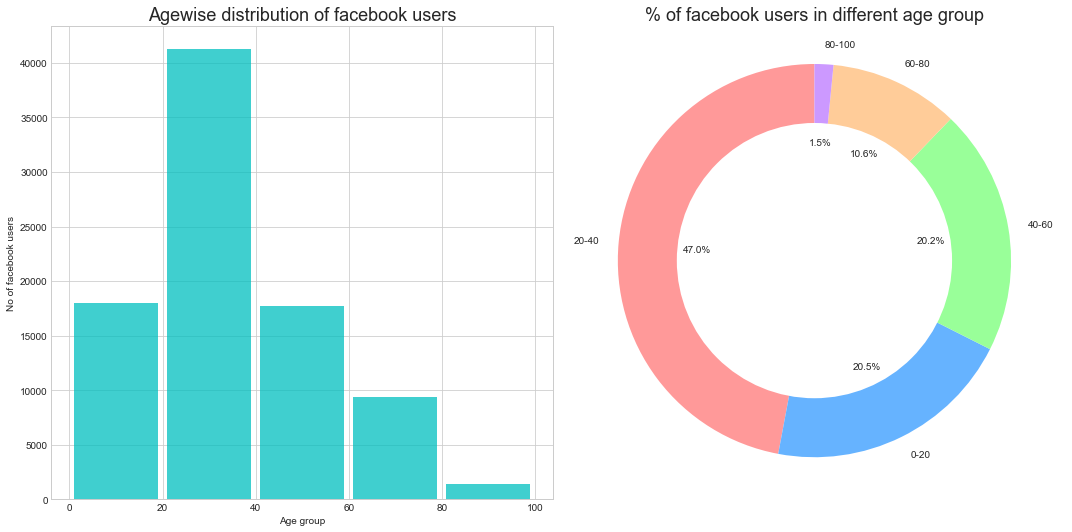

In [25]:
# Draw a histrogram and piechart to visualize which age group has more facebook users

fig = plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)

bin_edges = [0,20,40,60,80,100]
plt.hist(facebook_data['age'], bins=bin_edges, facecolor='c', alpha=0.75, rwidth=0.90)
plt.xlabel('Age group')
plt.ylabel('No of facebook users')
plt.title('Agewise distribution of facebook users', fontsize=18)
plt.grid(True)


plt.subplot(1,2,2)

labels = ['20-40', '0-20', '40-60', '60-80', '80-100']
sizes = facebook_data.age_group.value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#cc99ff']

plt.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
plt.title('% of facebook users in different age group', fontsize=18)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()

plt.show()


From above plots there are 47% of facebook users belong to 20-40 age group. 

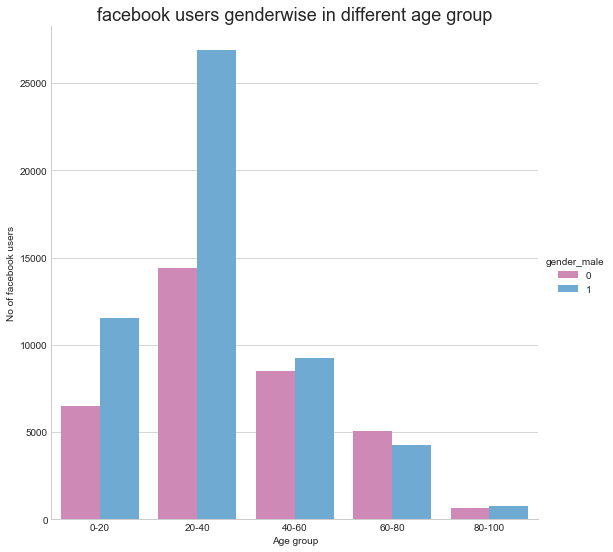

In [26]:
# Draw a factor plot to visualize facebook users genderwise in different age group

pkmn_type_colors = ['#DA7DBA',  # WE
                    '#5DADE2',  # NA
                   ]

fig = plt.figure(figsize=(20,10))
colors = ['lightskyblue', 'pink']
sns.factorplot(x='age_group', hue='gender_male', data=facebook_data, kind='count', palette=pkmn_type_colors, size=7.5)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.xlabel('Age group')
plt.ylabel('No of facebook users')
plt.title('facebook users genderwise in different age group', fontsize=18)
plt.show()

In each age group male users are more compared to female users except in age group of 60-80.

### **Friend count analysis**

Visualize total number of friends and average of total number of friends in different age group

Visualize total number of friends genderwise in different age group

Visualize average of total number of friends genderwise in different age group

Visulaize spread of friends count genderwise in different age group

Visualize average of total number of friendships initiated genderwise in each age group


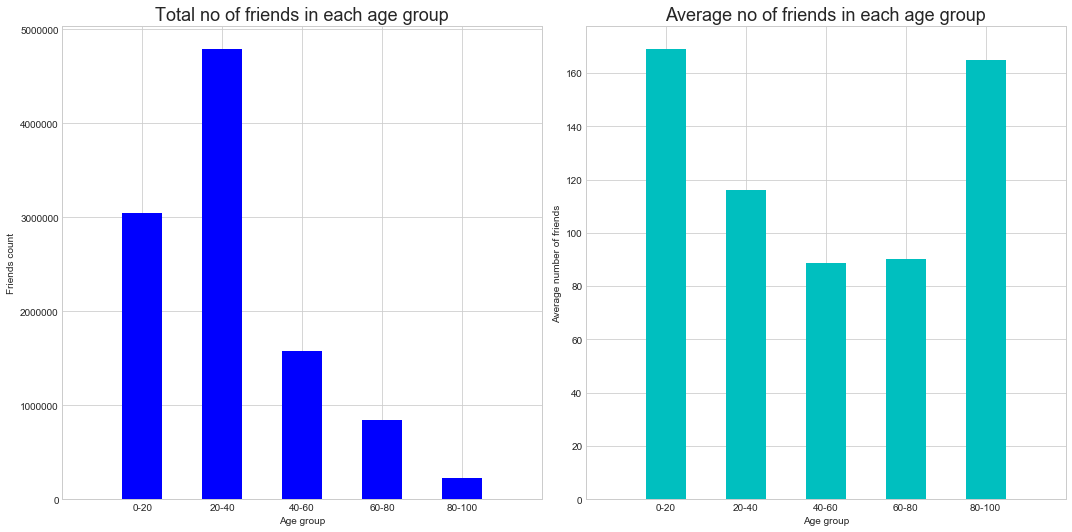

In [58]:
# Draw a bar plot to visualize number of friends and average number of friends in each age group

total_friends_count=facebook_data['friend_count'].groupby(facebook_data['age_group']).agg(['count', 'sum', 'mean', 'min', 'max'])

fig = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.bar(total_friends_count.index, total_friends_count['sum'], color='b', width=0.5)
locs, title = plt.xticks()
plt.xticks(locs,('', '0-20','20-40','40-60','60-80','80-100'))
plt.title('Total no of friends in each age group', fontsize=18)
plt.ylabel('Friends count')
plt.xlabel('Age group')

plt.subplot(1,2,2)
plt.bar(total_friends_count.index, total_friends_count['mean'], color='c', width=0.5)
locs, title = plt.xticks()
plt.xticks(locs,('', '0-20','20-40','40-60','60-80','80-100'))
plt.title('Average no of friends in each age group', fontsize=18)
plt.ylabel('Average number of friends')
plt.xlabel('Age group')

plt.tight_layout()
plt.show()

This graph shows 20-40 age group users have more friends and followed by 0-20 age group users. However, if we see the other graph, it shows average of friends are very high of 0-20 age group users from 20-40 age group users and followed by 80-100 age group users i.e. 80-100 age group users have more friends per user.

In [28]:
# Reset index of total_friends_count

total_friends_count.reset_index()

,age_group,count,sum,mean,min,max
0,0,18001,3042485,169.017555,0,619
1,1,41282,4790534,116.044135,0,619
2,2,17763,1576629,88.759162,0,618
3,3,9336,842962,90.291560,0,617
4,4,1359,224245,165.007358,0,616


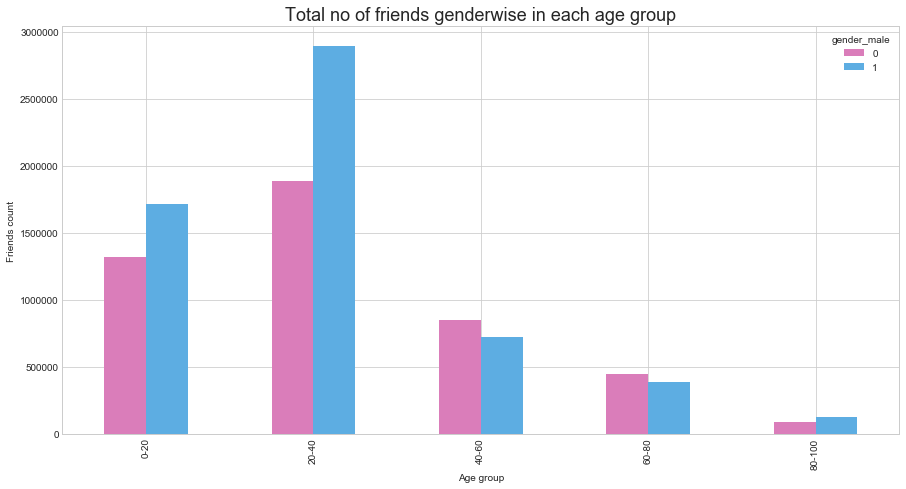

In [29]:
# Plot the graph to visualize total number of friends genderwise in each age group

total_friends_count=facebook_data['friend_count'].groupby([facebook_data['age_group'],facebook_data['gender_male']]).sum()

newcolors = ['#DA7DBA','#5DADE2']

total_friends_count.unstack('gender_male').plot(kind='bar', subplots=False, color=newcolors, figsize=(15,7.5))
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Total no of friends genderwise in each age group', fontsize=18)
plt.ylabel('Friends count')
plt.xlabel('Age group')
plt.show()

This plot shows male of 20-40 age group has more friends and followed by female of same age group.

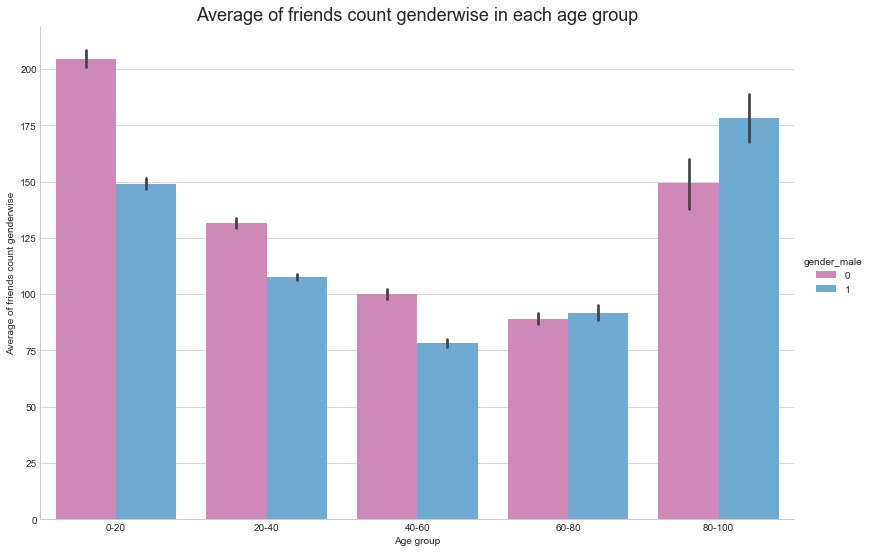

In [30]:
# Plot a graph to visualize average friend count genderwise in different age group

sns.factorplot(x="age_group", y="friend_count", data=facebook_data, kind="bar", hue='gender_male', aspect=1.5, palette=pkmn_type_colors, size=7.5)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.xlabel('Age group')
plt.ylabel('Average of friends count genderwise')
plt.title('Average of friends count genderwise in each age group', fontsize=18)
plt.show()

This plot shows female of 0-20 age group has more number of friends per user and followed by male of 80-100 age group users.

In [31]:
# Reset index of total_friends_count
total_friends_count.reset_index()

,age_group,gender_male,friend_count
0,0,0,1323689
1,0,1,1718796
2,1,0,1892826
3,1,1,2897708
4,2,0,853069
5,2,1,723560
6,3,0,451947
7,3,1,391015
8,4,0,92405
9,4,1,131840


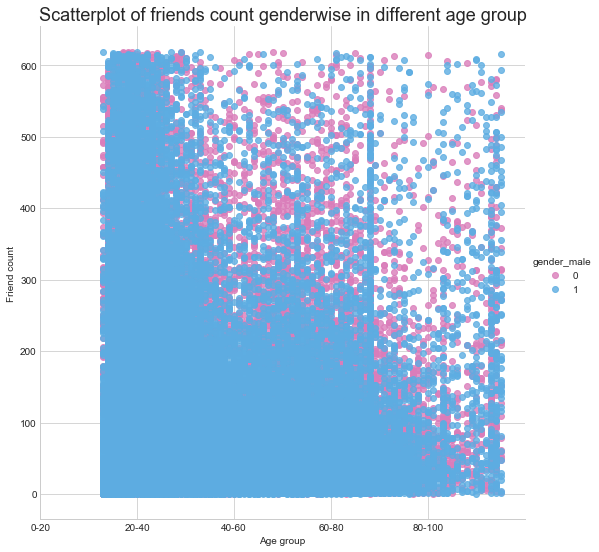

In [32]:
# Scatterplot of friends count genderwise in different age group 

sns.lmplot('age', 'friend_count', data=facebook_data, fit_reg=False, hue="gender_male",  palette=pkmn_type_colors, size=7.5)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.xlabel('Age group')
plt.ylabel('Friend count')
plt.title('Scatterplot of friends count genderwise in different age group', fontsize=18)
plt.show()

This graph visulaize the spread of friends count genderwise in different age group

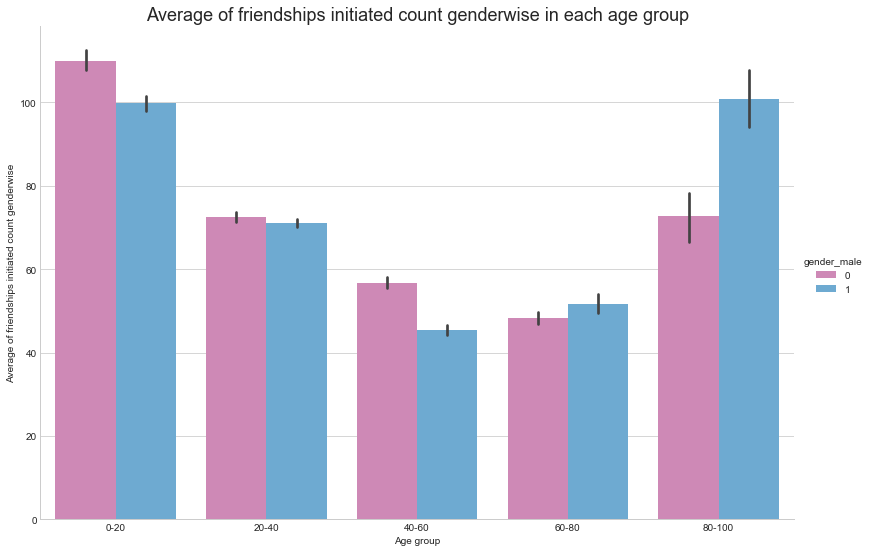

In [33]:
# Plot a graph to visualize average friendship initiated genderwise in different age group

sns.factorplot(x="age_group", y="friendships_initiated", data=facebook_data, kind="bar", hue='gender_male', aspect=1.5, palette=pkmn_type_colors, size=7.5)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.xlabel('Age group')
plt.ylabel('Average of friendships initiated count genderwise')
plt.title('Average of friendships initiated count genderwise in each age group', fontsize=18)
plt.show()

This plot shows female of 0-20 age group has more number of friends initiated per user and followed by male of 80-100 age group users.

### **Tenure analysis**

Visualize the number of users on board in past years

Visualize the number of users genderwise on board in past years

In [34]:
# Added a column to create the group on tenure basis

def tenure_bin(row):
  if row['tenure'] <= 365 :
     return 0
  if row['tenure'] > 365 and row['tenure'] <= 730 :
     return 1
  if row['tenure'] > 730 and row['tenure'] <= 1095 :
     return 2
  if row['tenure'] > 1095 and row['tenure'] <= 1460 :
     return 3
  if row['tenure'] > 1460 and row['tenure'] <= 1825 :
     return 4
  if row['tenure'] > 1825 and row['tenure'] <= 2190 :
     return 5
  if row['tenure'] > 2190 and row['tenure'] <= 2555 :
     return 6
  if row['tenure'] > 2555:
     return 7
  
facebook_data['tenure_bin'] = facebook_data.apply(lambda row: tenure_bin(row),axis=1)

In [35]:
# reset index after adding new column

facebook_data.reset_index(drop=True, inplace=True)

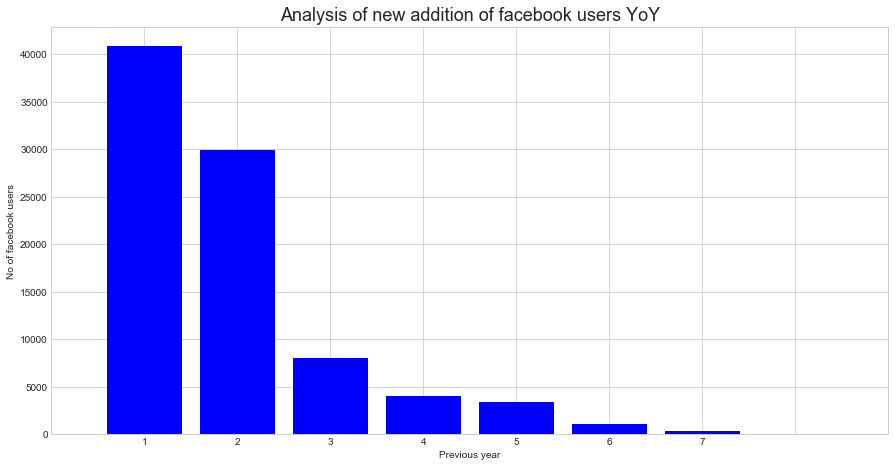

In [59]:
# Analysis of trend YoY - New users onboard

total_user_count=facebook_data['tenure'].groupby(facebook_data['tenure_bin']).agg(['count', 'sum', 'mean', 'min', 'max'])

fig = plt.figure(figsize=(15,7.5))
plt.bar(total_user_count.index, total_user_count['count'], color='b')
locs, title = plt.xticks()
plt.xticks(locs,('','1','2','3','4','5','6','7'))
plt.title('Analysis of new addition of facebook users YoY', fontsize=18)
plt.ylabel('No of facebook users')
plt.xlabel('Previous year')
plt.show()

This graph shows the very high increase in number of users on board on facebook year to year.

In [37]:
# reset index after doing groupby

total_user_count.reset_index(drop=True, inplace=True)

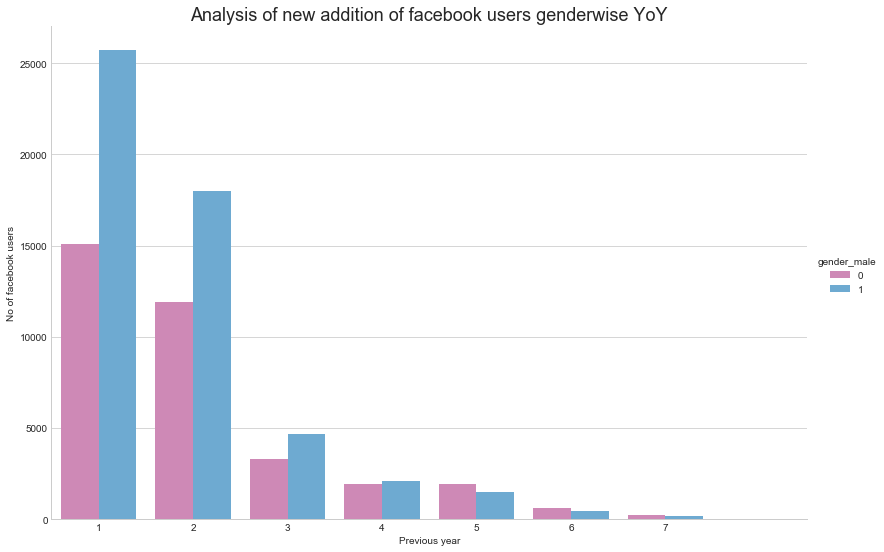

In [38]:
# Analysis of trend YoY - New users onboard gerderwise

fig = plt.figure(figsize=(15,7.5))
sns.factorplot(x='tenure_bin', hue='gender_male', data=facebook_data, kind='count', size=7.5, aspect=1.5, palette=pkmn_type_colors)
locs, title = plt.xticks()
plt.xticks(locs,('1','2','3','4','5','6','7'))
plt.title('Analysis of new addition of facebook users genderwise YoY', fontsize=18)
plt.ylabel('No of facebook users')
plt.xlabel('Previous year')
plt.show()

This graph shows the male are more getting on board on facebook than female year to year.

### **Likes analysis**

Visulaize the total mobile likes/likes received and total web likes/likes received comparision

Visualize the users genderwise who are using likes on mobile

Visualize the likes including mobile likes and www likes in different age group

Visualize the likes including mobile likes and www likes genderwise in different age group

Visualize the likes received including mobile likes received and www likes received in different age group

Visualize the likes received including mobile likes received and www likes received genderwise in different age group

Analysis of top 10 uesrs in terms of likes and likes received

In [39]:
facebook_data[['likes',	'likes_received',	'mobile_likes',	'mobile_likes_received',	'www_likes',	'www_likes_received']].describe()

,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000
mean,119.819708,81.540785,83.357336,47.400098,36.462327,34.140664
std,434.337114,691.007680,355.185415,511.974665,207.176109,210.957079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,7.000000,3.000000,4.000000,0.000000,2.000000
75%,66.000000,45.000000,37.000000,25.000000,5.000000,15.000000
max,21652.000000,178166.000000,21652.000000,138561.000000,12903.000000,39605.000000


Table shows descriptive statistics of like analysis

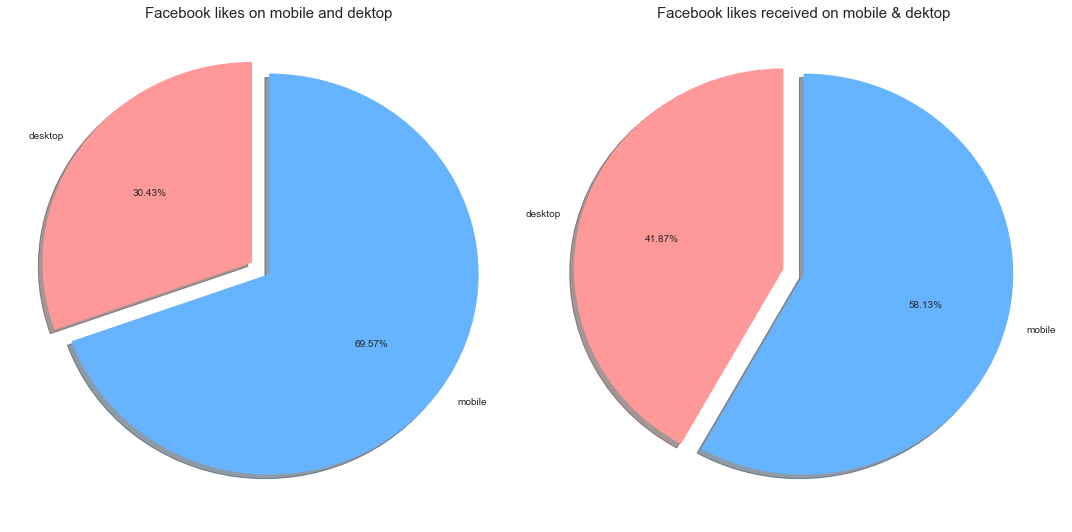

In [40]:
# Visualize the comparision in total number of facebook likes done and received on mobile and web 

fig = plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)

values=[facebook_data.www_likes.sum(), facebook_data.mobile_likes.sum()]
labels=['desktop','mobile']
explode = (0.1, 0)
colors = ['#ff9999','#66b3ff']
plt.pie(values, colors=colors, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, explode=explode)
plt.title('Facebook likes on mobile and dektop', fontsize=15)

plt.subplot(1,2,2)

values=[facebook_data.www_likes_received.sum(), facebook_data.mobile_likes_received.sum()]
labels=['desktop','mobile']
explode = (0.1, 0)
colors = ['#ff9999','#66b3ff']
plt.pie(values, colors=colors, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90, explode=explode)
plt.title('Facebook likes received on mobile & dektop',fontsize=15)

plt.tight_layout()
plt.show()

This pie chart shows most of the facebook users were done likes and receiving likes on mobile and few on desktop.

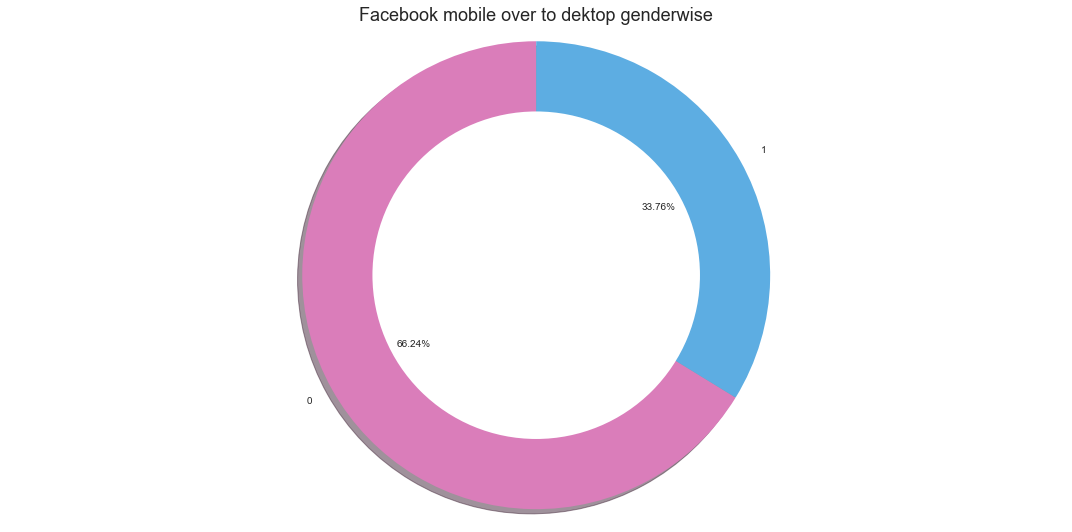

In [41]:
# Visulaize the users genderwise who are using more mobile facebook than web

m_over_d_likes = facebook_data[(facebook_data['mobile_likes'] >= facebook_data['www_likes'])].groupby(['gender_male'])['mobile_likes'].sum()

fig = plt.figure(figsize=(15,7.5))
colors = ['#DA7DBA', '#5DADE2']
explode = (0.2, 0)

plt.pie(m_over_d_likes, labels=m_over_d_likes.index, autopct='%1.2f%%', shadow=True, colors=colors, startangle=90)
plt.title('Facebook mobile over to dektop genderwise', fontsize=18)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') 

plt.tight_layout()
plt.show()

Almost 2/3rd percentage of facebook usage by females on mobile and least used by males.

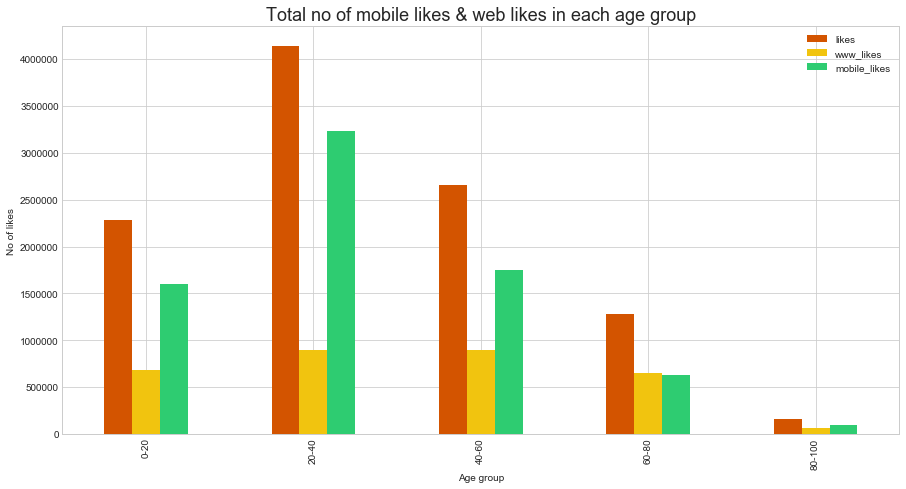

In [42]:
# Plot the graph to visualize mobile likes and web likes in each age group

like_analysis = facebook_data[['likes','www_likes','mobile_likes']].groupby(facebook_data['age_group']).sum()

newcolors = ['#D35400','#F1C40F','#2ECC71']

like_analysis.plot(kind='bar', subplots=False, color=newcolors, figsize=(15,7.5))
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Total no of mobile likes & web likes in each age group', fontsize=18)
plt.ylabel('No of likes')
plt.xlabel('Age group')
plt.show()

This graph shows all the age groups users do more likes using mobile facebook. Also, 20-40 age group users have been done more likes through mobile only.

In [43]:
# Reset index of total_friends_count used for group by 1 column

like_analysis.reset_index(drop=True, inplace=True)

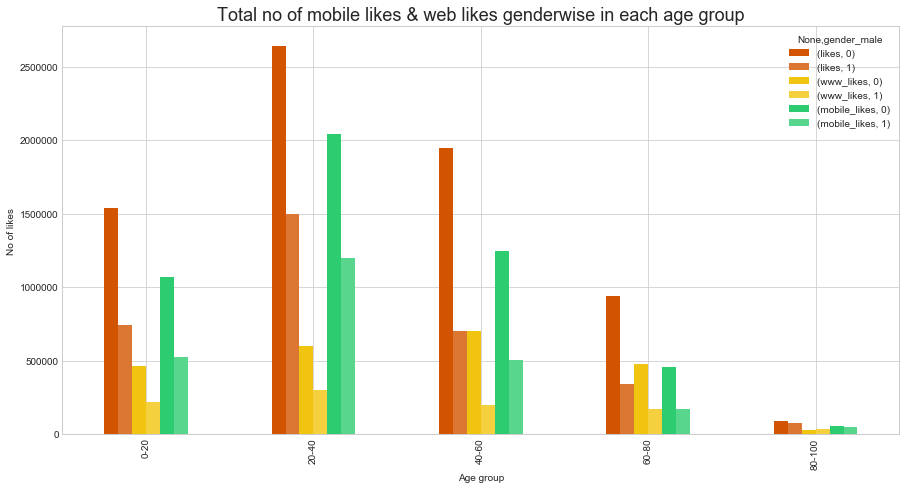

In [44]:
# Plot the graph to visualize mobile likes and web likes genderwise in each age group

like_analysis = facebook_data[['likes','www_likes','mobile_likes']].groupby([facebook_data['age_group'],facebook_data['gender_male']]).sum()

newcolors = ['#D35400','#DC7633','#F1C40F','#F4D03F','#2ECC71','#58D68D']

like_analysis.unstack('gender_male').plot(kind='bar', subplots=False, color=newcolors, figsize=(15,7.5))
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Total no of mobile likes & web likes genderwise in each age group', fontsize=18)
plt.ylabel('No of likes')
plt.xlabel('Age group')
plt.show()

This graph shows female are using more mobile facebook than male for doing likes in all the age group

In [45]:
# Reset index

like_analysis.reset_index(drop=True, inplace=True)

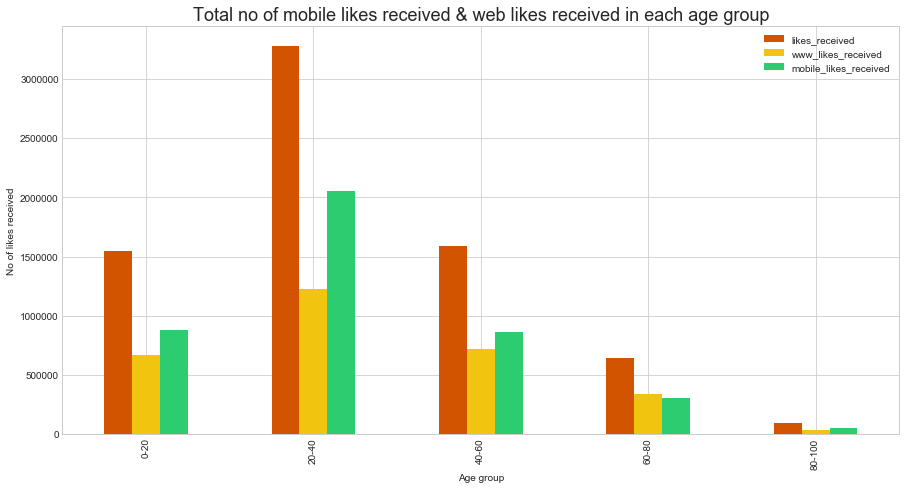

In [46]:
# Plot the graph to visualize mobile likes received and web likes received in each age group

like_analysis = facebook_data[['likes_received','www_likes_received','mobile_likes_received']].groupby(facebook_data['age_group']).sum()

newcolors = ['#D35400','#F1C40F','#2ECC71']

like_analysis.plot(kind='bar', subplots=False, color=newcolors, figsize=(15,7.5))
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Total no of mobile likes received & web likes received in each age group', fontsize=18)
plt.ylabel('No of likes received')
plt.xlabel('Age group')
plt.show()

This graph shows all the age groups users receives the likes on mobile facebook except 60-80 age group user where web like recevied is more than mobile.

In [47]:
# Reset index of total_friends_count used for group by 1 column

like_analysis.reset_index(drop=True, inplace=True)

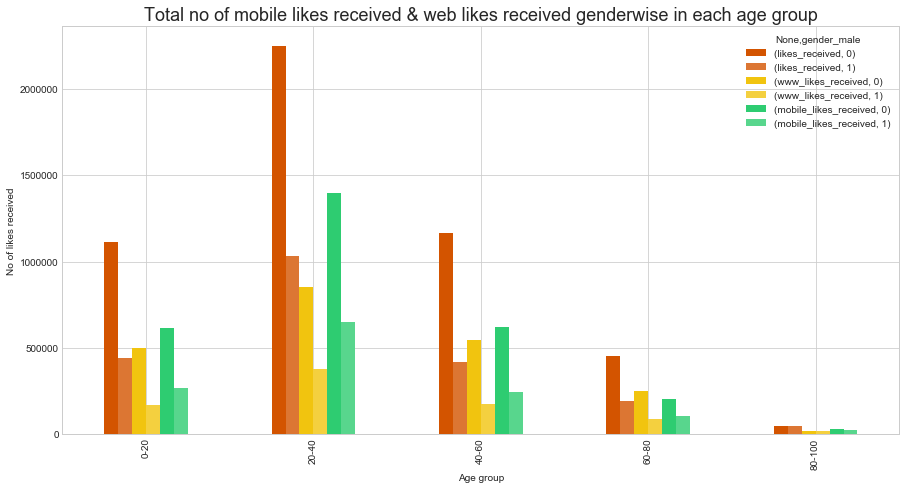

In [48]:
# Plot the graph to visualize mobile likes received and web likes received genderwise in each age group

like_analysis = facebook_data[['likes_received','www_likes_received','mobile_likes_received']].groupby([facebook_data['age_group'],facebook_data['gender_male']]).sum()

newcolors = ['#D35400','#DC7633','#F1C40F','#F4D03F','#2ECC71','#58D68D']

like_analysis.unstack('gender_male').plot(kind='bar', subplots=False, color=newcolors, figsize=(15,7.5))
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Total no of mobile likes received & web likes received genderwise in each age group', fontsize=18)
plt.ylabel('No of likes received')
plt.xlabel('Age group')
plt.show()

This graph shows female are received more likes than male in all the age group

In [49]:
# Reset index of total_friends_count used for group by 1 column

like_analysis.reset_index(drop=True, inplace=True)

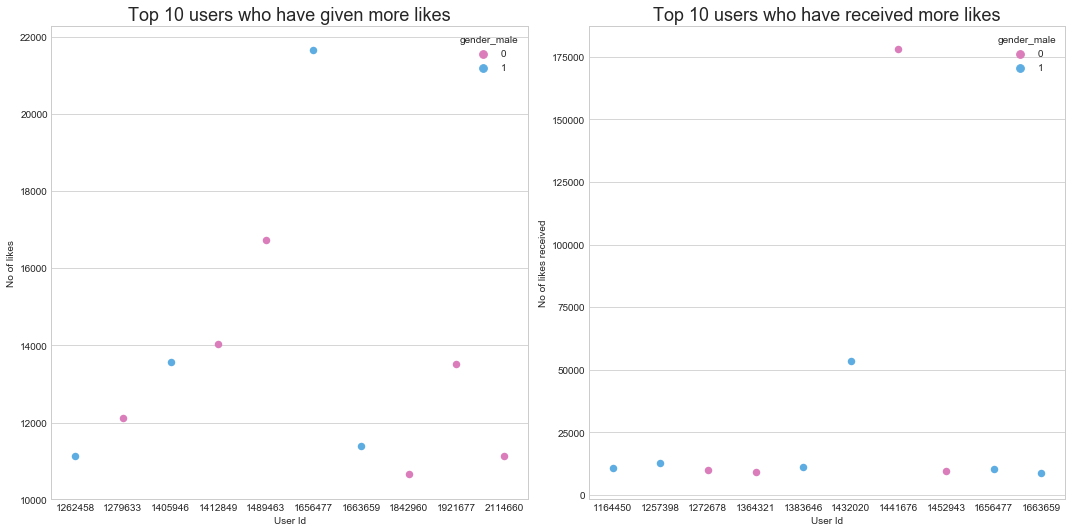

In [50]:
# Top 10 uesrs in terms of likes and likes received

top10_likes = pd.DataFrame(facebook_data.sort_values(['likes'], ascending=False).head(10))
top10_likes_received = pd.DataFrame(facebook_data.sort_values(['likes_received'],ascending=False).head(10))

fig = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
sns.swarmplot(x='userid', y='likes', hue='gender_male', data=top10_likes, size=7.5, palette=pkmn_type_colors)
plt.title("Top 10 users who have given more likes", fontsize=18)
plt.ylabel('No of likes')
plt.xlabel('User Id')

plt.subplot(1,2,2)
sns.swarmplot(x='userid', y='likes_received', hue='gender_male', data=top10_likes_received, size=7.5, palette=pkmn_type_colors)
plt.title("Top 10 users who have received more likes", fontsize=18)
plt.ylabel('No of likes received')
plt.xlabel('User Id')

plt.tight_layout()
plt.show()

In [51]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87741 entries, 0 to 87740
Data columns (total 17 columns):
userid                   87741 non-null int64
age                      87741 non-null int64
dob_day                  87741 non-null int64
dob_year                 87741 non-null int64
dob_month                87741 non-null int64
tenure                   87741 non-null float64
friend_count             87741 non-null int64
friendships_initiated    87741 non-null int64
likes                    87741 non-null int64
likes_received           87741 non-null int64
mobile_likes             87741 non-null int64
mobile_likes_received    87741 non-null int64
www_likes                87741 non-null int64
www_likes_received       87741 non-null int64
gender_male              87741 non-null uint8
age_group                87741 non-null int64
tenure_bin               87741 non-null int64
dtypes: float64(1), int64(15), uint8(1)
memory usage: 10.8 MB


In [52]:
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male,age_group,tenure_bin
87736,1289193,23,15,1990,3,457.0,598,497,4576,1536,4576,1251,0,285,1,1,1
87737,1609509,24,26,1989,3,421.0,617,291,9552,1704,9552,1536,0,168,0,1,1
87738,1412849,31,1,1982,10,133.0,582,133,14039,3274,14039,3077,0,197,0,1,0
87739,1921677,50,14,1963,11,432.0,585,94,13529,6287,13529,5856,0,431,0,2,1
87740,1656477,68,12,1945,3,550.0,584,347,21652,10220,21652,8584,0,1636,1,3,1


In [53]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male,age_group,tenure_bin
count,8.774100e+04,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000,87741.000000
mean,1.597462e+06,34.701565,14.524897,1978.298435,6.281613,503.902849,119.406606,71.919240,119.819708,81.540785,83.357336,47.400098,36.462327,34.140664,0.600369,1.256562,0.906782
std,3.440392e+05,17.683569,8.999817,17.683569,3.526058,430.647240,126.312318,84.248129,434.337114,691.007680,355.185415,511.974665,207.176109,210.957079,0.489825,0.952266,1.179166
min,1.000013e+06,13.000000,1.000000,1918.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.299602e+06,21.000000,7.000000,1966.000000,3.000000,216.000000,29.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.596996e+06,28.000000,14.000000,1985.000000,6.000000,392.000000,73.000000,41.000000,9.000000,7.000000,3.000000,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000
75%,1.896271e+06,47.000000,22.000000,1992.000000,9.000000,632.000000,168.000000,95.000000,66.000000,45.000000,37.000000,25.000000,5.000000,15.000000,1.000000,2.000000,1.000000
max,2.193542e+06,95.000000,31.000000,2000.000000,12.000000,2697.000000,619.000000,585.000000,21652.000000,178166.000000,21652.000000,138561.000000,12903.000000,39605.000000,1.000000,4.000000,7.000000


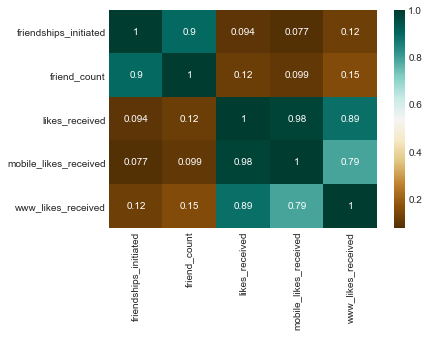

In [54]:
sns.heatmap(facebook_data[['friendships_initiated','friend_count','likes_received','mobile_likes_received','www_likes_received']].corr()
            ,cmap="BrBG",annot=True)

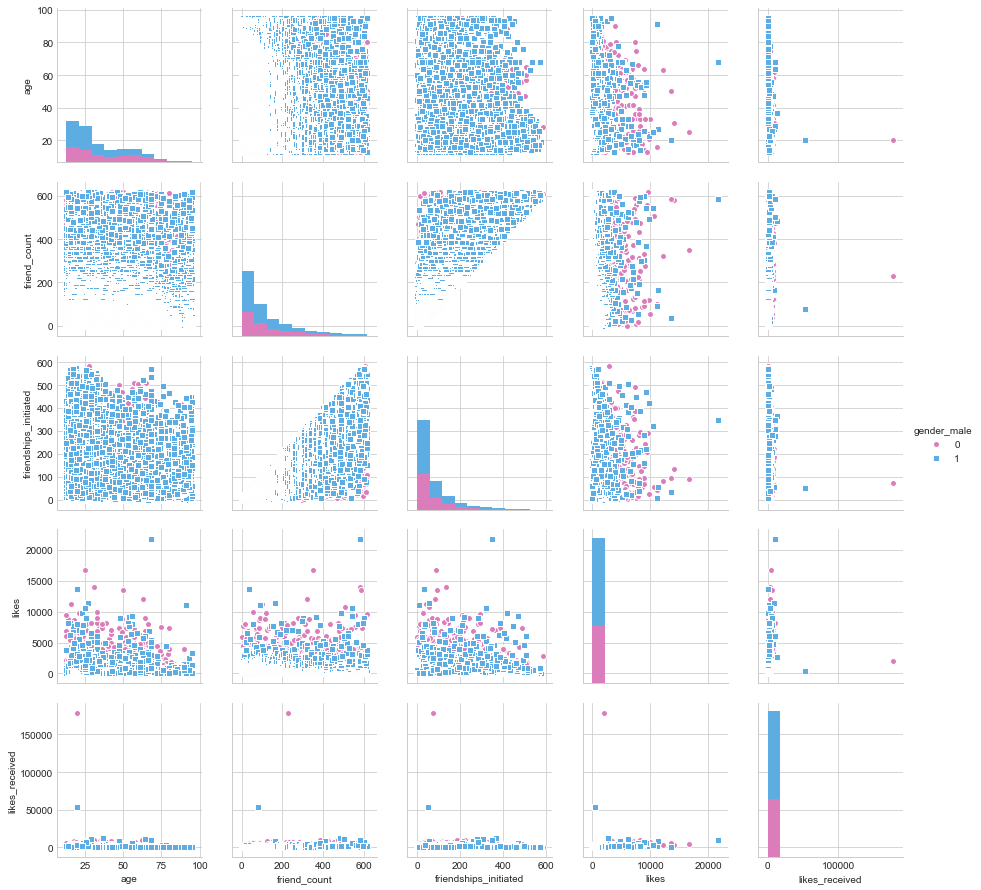

In [55]:
#sns.pairplot(facebook_data, x_vars=['age','age_group'] , y_vars=['friendships_initiated', 'friend_count', 'likes_received', 'mobile_likes_received', 'www_likes_received'] , hue="gender_male", palette=pkmn_type_colors)
sns.pairplot(facebook_data, vars=['age', 'friend_count', 'friendships_initiated', 'likes', 'likes_received'] , hue="gender_male", palette=pkmn_type_colors, markers=["o", "s"])

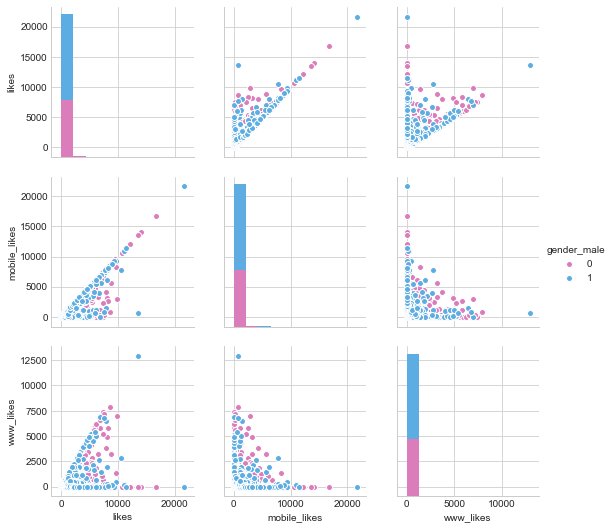

In [56]:
sns.pairplot(facebook_data, vars=['likes', 'mobile_likes', 'www_likes'] , hue="gender_male", palette=pkmn_type_colors)

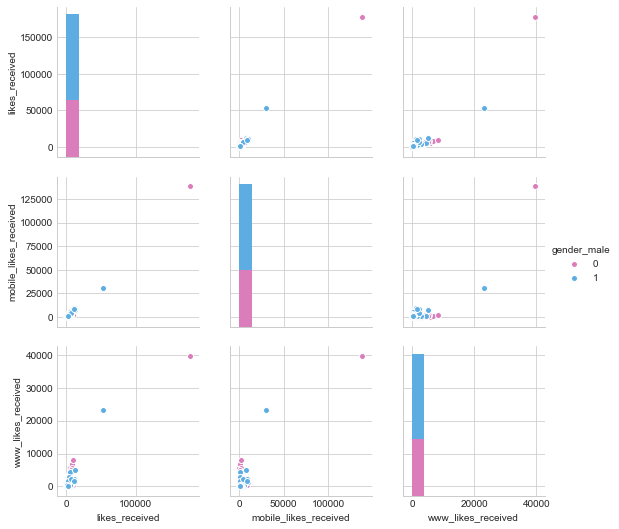

In [57]:
sns.pairplot(facebook_data, vars=['likes_received', 'mobile_likes_received', 'www_likes_received'] , hue="gender_male", palette=pkmn_type_colors)